In [1]:
#import libraries
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
from sklearn.impute import SimpleImputer #The imputer is an estimator used to fill the missing values in datasets.
from sklearn.model_selection import KFold # K-Folds cross-validator. Provides train/test indices to split data in train/test sets 
from sklearn import linear_model #Linear models describe a continuous response variable as a function of one or more predictor variables
from sklearn.metrics import make_scorer #This factory function wraps scoring functions for use in GridSearchCV and cross_val_score 

from sklearn import svm #SVMs are used in applications like email classification, gene classification, and in web pages.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn import neighbors
from math import sqrt



In [2]:
# read data
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')
print(df)



         time          I         IQ         ID         V        VQ        VD  \
0     0.00000    2.01903   -0.65599    1.90949   0.38362  -0.19181   0.33222   
1     0.00000    4.03787   -1.31194    3.81879   0.76647  -0.38323   0.66378   
2     0.00000    6.05652   -1.96785    5.72792   1.14855  -0.57428   0.99467   
3     0.00001    8.07499   -2.62372    7.63685   1.52987  -0.76494   1.32491   
4     0.00001   10.09327   -3.27956    9.54561   1.91043  -0.95521   1.65448   
...       ...        ...        ...        ...       ...       ...       ...   
1194  0.00239  504.84798  439.72087 -248.02628  32.25609  28.05322 -15.92081   
1195  0.00239  503.28018  439.01576 -246.08149  31.85794  27.79946 -15.56015   
1196  0.00239  501.71607  438.31058 -244.13695  31.46171  27.54619 -15.20023   
1197  0.00239  500.15570  437.60534 -242.19266  31.06745  27.29341 -14.84103   
1198  0.00240  498.59908  436.90004 -240.24861  30.67518  27.04113 -14.48256   

           torq     power        wR    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1199 non-null   float64
 1   I       1199 non-null   float64
 2   IQ      1199 non-null   float64
 3   ID      1199 non-null   float64
 4   V       1199 non-null   float64
 5   VQ      1199 non-null   float64
 6   VD      1199 non-null   float64
 7   torq    1199 non-null   float64
 8   power   1199 non-null   float64
 9   wR      1199 non-null   float64
 10  theta   1199 non-null   float64
dtypes: float64(11)
memory usage: 103.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,1199.0,0.001198,0.000693,0.00000,0.000600,0.00120,0.001800,0.00240
I,1199.0,360.784653,168.126399,2.01903,183.060535,474.41106,493.717955,516.96682
IQ,1199.0,310.046618,170.421767,-13.11257,163.926460,427.58408,440.401960,459.86708
ID,1199.0,-136.085525,121.462957,-257.75389,-225.213130,-196.13260,-58.821130,190.04049
V,1199.0,49.894441,24.066329,0.38362,31.974260,48.18368,70.054380,96.08634
VQ,1199.0,44.877143,25.933283,-3.77508,29.436850,45.86848,66.439345,91.24581
VD,1199.0,-13.478368,14.167890,-32.93660,-22.778300,-16.23944,-10.324235,30.13912
torq,1199.0,165.323247,106.687343,-5.23920,48.223865,241.58641,255.940320,273.36792
power,1199.0,466.411941,451.166844,-0.00700,10.683500,360.54800,863.921000,1412.18500
wR,1199.0,17.727681,16.504696,-0.02500,1.328410,13.87208,32.105690,50.44719


In [5]:
# Count the number of NaNs each column has.
nans=pd.isnull(df).sum()
nans[nans>0]

Series([], dtype: int64)

In [6]:
# Count the column types
df.dtypes.value_counts()

float64    11
dtype: int64

In [7]:
df.corr()

,time,I,IQ,ID,V,VQ,VD,torq,power,wR,theta
time,1.000000,0.877879,0.881824,-0.839766,0.224825,0.310478,-0.474434,0.911003,0.966748,0.972828,0.888905
I,0.877879,1.000000,0.979984,-0.911569,0.624068,0.652728,-0.665297,0.980463,0.778803,0.783457,0.602501
IQ,0.881824,0.979984,1.000000,-0.967555,0.643325,0.708822,-0.766321,0.979442,0.759006,0.767412,0.585253
ID,-0.839766,-0.911569,-0.967555,1.000000,-0.632337,-0.727074,0.865110,-0.924512,-0.706219,-0.713770,-0.544331
V,0.224825,0.624068,0.643325,-0.632337,1.000000,0.976862,-0.814770,0.535865,0.012148,0.021946,-0.188262
VQ,0.310478,0.652728,0.708822,-0.727074,0.976862,1.000000,-0.904655,0.592678,0.086085,0.098844,-0.110895
VD,-0.474434,-0.665297,-0.766321,0.865110,-0.814770,-0.904655,1.000000,-0.649757,-0.269468,-0.279782,-0.106303
torq,0.911003,0.980463,0.979442,-0.924512,0.535865,0.592678,-0.649757,1.000000,0.826362,0.831389,0.650684
power,0.966748,0.778803,0.759006,-0.706219,0.012148,0.086085,-0.269468,0.826362,1.000000,0.998284,0.954023
wR,0.972828,0.783457,0.767412,-0.713770,0.021946,0.098844,-0.279782,0.831389,0.998284,1.000000,0.955614


Text(37.722222222222214, 0.5, 'wR')

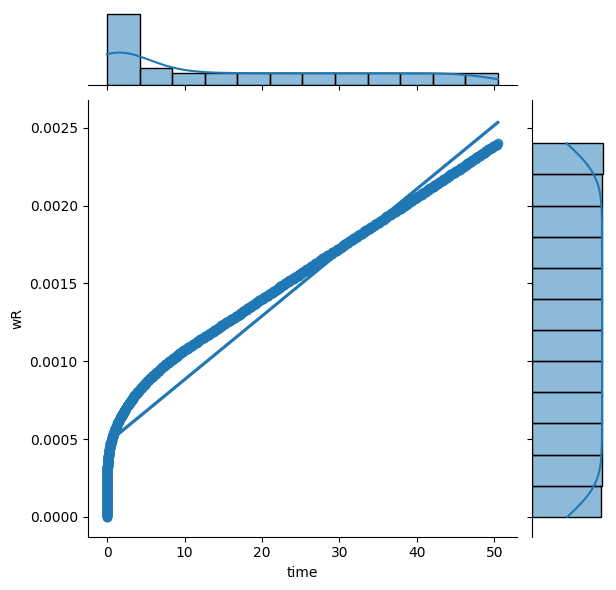

In [37]:
import seaborn as sns
sns.jointplot(x='wR', y='time', data=df, kind='reg')
plt.xlabel("time")
plt.ylabel("wR")

C:\Users\csc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


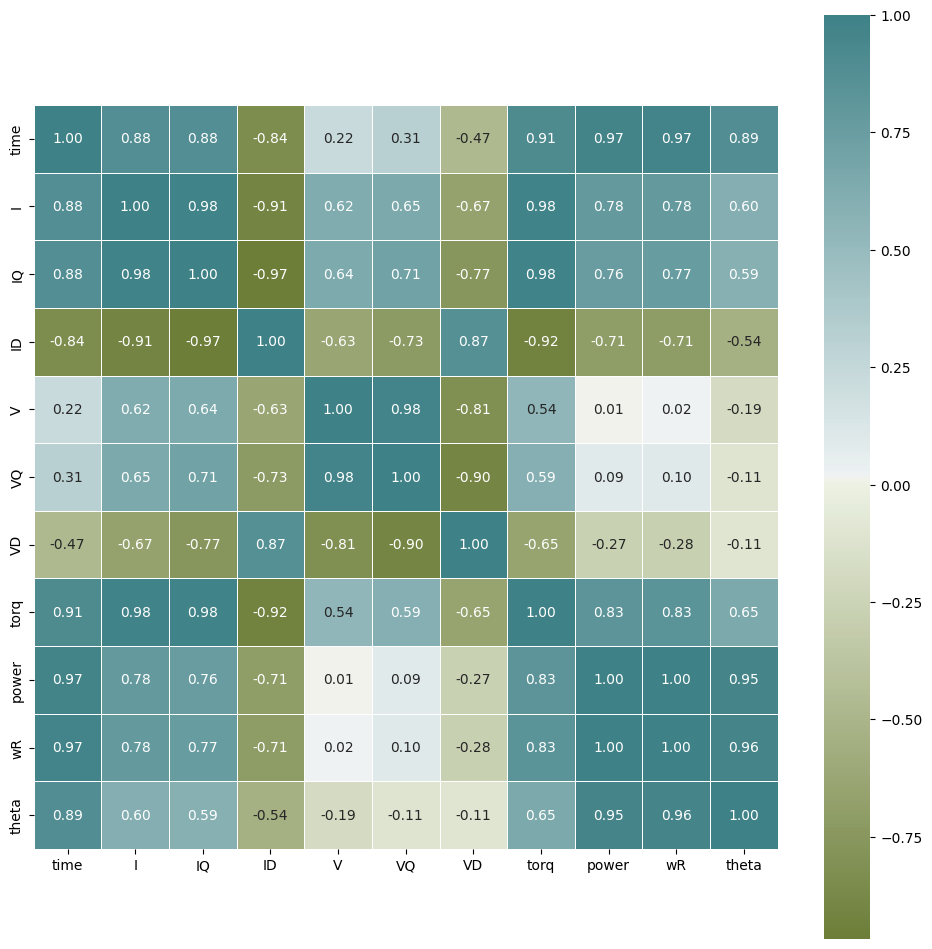

In [9]:
#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

In [10]:
import statsmodels.api as sm
#Defining dependet and independent variable
X = df['ID']
X=sm.add_constant(X)

y = df['wR']

lm=sm.OLS(y,X)
model=lm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wR   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1243.
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.36e-187
Time:                        00:40:42   Log-Likelihood:                -4635.4
No. Observations:                1199   AIC:                             9275.
Df Residuals:                    1197   BIC:                             9285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5289      0.502      9.028      0.000       3.545       5.513
ID            -0.0970      0.003    -35.259      0.000      -0.102      -0.092
==============================================================================
Omnibus:                      340.035   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.418
Skew:                           0.373   Prob(JB):                     2.09e-18
Kurtosis:                       1.964   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')


# Extract the columns containing the data to be normalized
columns_to_normalize = ['time', 'I','IQ', 'ID', 'V','VQ','VD','wR','theta']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save the normalized data back to a CSV file
df.to_csv('normalized_data.csv', index=False)


In [12]:
model.params

const    4.528895
ID      -0.096989
dtype: float64

In [13]:
print("f_pvalue:", "%.4f" % model.f_pvalue)

f_pvalue: 0.0000


In [14]:
model.mse_model #mean squared error is too much. It is not good.

166260.31473533704

In [15]:
model.rsquared #Not bad

0.5094677705553714

In [16]:
model.rsquared_adj #Not bad

0.5090579691940977

In [17]:
model.fittedvalues[0:5] #Predicted values

0    4.343696
1    4.158515
2    3.973350
3    3.788205
4    3.603077
dtype: float64

In [18]:
y[0:5] #Real values

0    0.00000
1   -0.00007
2   -0.00020
3   -0.00040
4   -0.00066
Name: wR, dtype: float64

In [19]:
#Model equation
print("Motor speed = " + 
      str("%.3f" % model.params[0]) + ' + i_d' + "*" + 
      str("%.3f" % model.params[1]))

Motor speed = 4.529 + i_d*-0.097


Index(['time', 'I', 'IQ', 'ID', 'V', 'VQ', 'VD', 'torq', 'power', 'wR',
       'theta'],
      dtype='object')


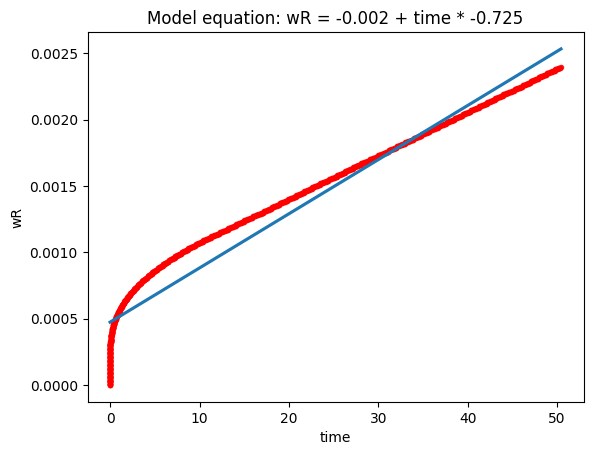

In [20]:
#Model Visualization 
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')

# Create regression plot
g = sns.regplot(x='wR', y='time', data=df, ci=None, scatter_kws={'color': 'r', 's':9})

# Set plot title and axis labels
g.set_title('Model equation: wR = -0.002 + time * -0.725')
g.set_ylabel('wR')
g.set_xlabel('time')
print(df.columns)


In [21]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y, model.fittedvalues)
rmse=np.sqrt(mse)
rmse

11.554738560414846

In [22]:
k_t=pd.DataFrame({'Real_values':y[0:50], 
                  'Predicted_values' :model.fittedvalues[0:50]})
k_t['error']=k_t['Real_values']-k_t['Predicted_values']
k_t.head()

,Real_values,Predicted_values,error
0,0.00000,4.343696,-4.343696
1,-0.00007,4.158515,-4.158585
2,-0.00020,3.973350,-3.973550
3,-0.00040,3.788205,-3.788605
4,-0.00066,3.603077,-3.603737


In [23]:
model.resid[0:10] #It is easy way to learn residuals.

0   -4.343696
1   -4.158585
2   -3.973550
3   -3.788605
4   -3.603737
5   -3.418957
6   -3.234255
7   -3.049641
8   -2.865104
9   -2.680656
dtype: float64

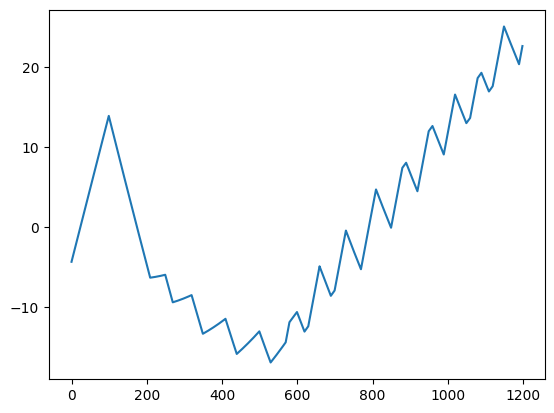

In [24]:
plt.plot(model.resid);

In [25]:
import statsmodels.api as sm
#Defining dependet and independent variable
X = df['VD']
X=sm.add_constant(X)

y = df['wR']

lm=sm.OLS(y,X)
model=lm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wR   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 29 May 2023   Prob (F-statistic):           5.31e-23
Time:                        00:40:45   Log-Likelihood:                -5013.5
No. Observations:                1199   AIC:                         1.003e+04
Df Residuals:                    1197   BIC:                         1.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3347      0.632     21.099      0.000      12.095      14.575
VD            -0.3259      0.032    -10.082      0.000      -0.389      -0.263
==============================================================================
Omnibus:                      324.018   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.424
Skew:                           0.632   Prob(JB):                     7.87e-29
Kurtosis:                       2.003   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params

const    13.334701
VD       -0.325928
dtype: float64

In [27]:
print("f_pvalue:", "%.4f" % model.f_pvalue)

f_pvalue: 0.0000


In [28]:
model.mse_model #mean squared error is too much. It is not good.

25545.300719313498

In [29]:
model.rsquared #Not bad

0.07827789467590285

In [30]:
model.fittedvalues[0:5] #Predicted values

0    13.226421
1    13.118356
2    13.010510
3    12.902875
4    12.795459
dtype: float64

In [31]:
y[0:5] #Real values

0    0.00000
1   -0.00007
2   -0.00020
3   -0.00040
4   -0.00066
Name: wR, dtype: float64

In [32]:
#Model equation
print("Motor speed = " +
      str("%.3f" % model.params[0]) + ' + VD' + "*" + 
      str("%.3f" % model.params[1]))

Motor speed = 13.335 + VD*-0.326


In [33]:
#Model Visualization 
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')

# Create regression plot
g = sns.regplot(x='time', y='torque', data=df, ci=None, scatter_kws={'color': 'r', 's':9})

# Set plot title and axis labels
g.set_title('Model equation: torque = -0.002 + time * -0.725')
g.set_ylabel('torque')
g.set_xlabel('time')


KeyError: 'torque'

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y, model.fittedvalues)
rmse=np.sqrt(mse)
rmse

15.838948675322719

In [ ]:
k_t=pd.DataFrame({'Real_values':y[0:50], 
                  'Predicted_values' :model.fittedvalues[0:50]})
k_t['error']=k_t['Real_values']-k_t['Predicted_values']
k_t.head()

,Real_values,Predicted_values,error
0,0.00000,13.226421,-13.226421
1,-0.00007,13.118356,-13.118426
2,-0.00020,13.010510,-13.010710
3,-0.00040,12.902875,-12.903275
4,-0.00066,12.795459,-12.796119


In [ ]:
model.resid[0:10] #It easy way to learn residuals.

0   -13.226421
1   -13.118426
2   -13.010710
3   -12.903275
4   -12.796119
5   -12.689248
6   -12.582649
7   -12.476335
8   -12.370296
9   -12.264535
dtype: float64

In [ ]:
#FORMULA FOR THETA USING LINEAR REGRESSION

import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')

# Select the columns to use in the model
X = df[['I', 'V']]
y = df['theta']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print(f'theta = {model.intercept_} + {model.coef_[0]} * I  + {model.coef_[1]} * V')


theta = 0.00018804664472094545 + 7.890223180930223e-06 * I  + -4.3198739756084706e-05 * V


In [ ]:
#FORMULA FOR SPEED USING LINEAR REGRESSION

import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\normalized_data.csv')

# Select the columns to use in the model
X = df[['I', 'V']]
y = df['wR']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print(f'wR = {model.intercept_} + {model.coef_[0]} * I  + {model.coef_[1]} * V') 




wR = -0.013487343765569704 + 1.2627722571390583 * I  + -0.9946226623605675 * V


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')

# Select the columns to use in the model
X = df[['I', 'V']]
y = df['wR']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print(model.coef_)
print(model.intercept_)



[ 0.1237696  -0.52454919]
-0.7544027506638145


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the dataset
df = pd.read_csv(R'C:\Users\csc\OneDrive\Desktop\Python Program\Project 3- Sensorless Speed Control of PMSM motor using machine learning\big-DATA.csv')

# Extract the input and output variables
x = df["I"].values.reshape(-1,1)
y = df["wR"].values.reshape(-1,1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Print the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#formula prediction 
print("wR = 0.07691073 * I - 10.02053037")

Coefficients: [[0.07691073]]
Intercept: [-10.02053037]
wR = 0.07691073 * I - 10.02053037


In [ ]:
plt.plot(model.resid);

AttributeError: 'LinearRegression' object has no attribute 'resid'